## Steps 1 - 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew
import statsmodels.api as sm

%matplotlib inline

## Step 6

In [2]:
gdp_df=pd.read_csv('data/gdp_per_capita.csv')

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2017,1758.465636,NaN
1,Afghanistan,2016,1757.023490,NaN
2,Afghanistan,2015,1766.593077,NaN
3,Afghanistan,2014,1795.735834,NaN
4,Afghanistan,2013,1807.762344,NaN
5,Afghanistan,2012,1772.764974,NaN
6,Afghanistan,2011,1626.764793,NaN
7,Afghanistan,2010,1671.581238,NaN
8,Afghanistan,2009,1502.354073,NaN
9,Afghanistan,2008,1267.644939,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6497,Zimbabwe,1992,2591.007534,NaN
6498,Zimbabwe,1991,2906.272849,NaN
6499,Zimbabwe,1990,2819.549467,NaN
6500,footnoteSeqID,Footnote,NaN,NaN
6501,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [5]:
gdp_df=gdp_df[0:6500]
#could've used skipfooter

In [6]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6495,Zimbabwe,1994,2768.309953,NaN
6496,Zimbabwe,1993,2572.870395,NaN
6497,Zimbabwe,1992,2591.007534,NaN
6498,Zimbabwe,1991,2906.272849,NaN
6499,Zimbabwe,1990,2819.549467,NaN


## Step 7

In [7]:
gdp_df.shape

(6500, 4)

In [8]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 4 columns):
Country or Area    6500 non-null object
Year               6500 non-null object
Value              6500 non-null float64
Value Footnotes    1 non-null float64
dtypes: float64(2), object(2)
memory usage: 203.2+ KB


## Step 8 

In [9]:
gdp_df=gdp_df.drop(columns={'Value Footnotes'})
gdp_df=gdp_df.rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'})

In [10]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2017,1758.465636
1,Afghanistan,2016,1757.023490
2,Afghanistan,2015,1766.593077
3,Afghanistan,2014,1795.735834
4,Afghanistan,2013,1807.762344


## Step 9(a)

In [11]:
continents_df=pd.read_csv('data/continents.csv')

In [12]:
#To be changed in gdp_df
#* Change "CÃ´te d'Ivoire" to "Ivory Coast"
#* Change "CuraÃ§ao" to "Curaçao"
#* Change "SÃ£o TomÃ© and Principe" to "Sao Tome and Principe"
#* Change "Sint Maarten (Dutch part)" to "Sint Maarten"

In [13]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 3 columns):
Country           6500 non-null object
Year              6500 non-null object
GDP_Per_Capita    6500 non-null float64
dtypes: float64(1), object(2)
memory usage: 152.4+ KB


In [14]:
gdp_df = gdp_df.replace({
    "CÃ´te d'Ivoire": 'Ivory Coast', 
    'CuraÃ§ao': 'Curaçao', 
    'SÃ£o TomÃ© and Principe':'Sao Tome and Principe',
    'Sint Maarten (Dutch part)':' "Sint Maarten'
})

In [15]:
gdp_df[gdp_df.Country=='Ivory Coast']

,Country,Year,GDP_Per_Capita
792,Ivory Coast,2017,3564.595846
793,Ivory Coast,2016,3395.088932
794,Ivory Coast,2015,3225.188859
795,Ivory Coast,2014,3038.844827
796,Ivory Coast,2013,2864.048627
797,Ivory Coast,2012,2696.191639
798,Ivory Coast,2011,2495.495125
799,Ivory Coast,2010,2673.013083
800,Ivory Coast,2009,2682.036638
801,Ivory Coast,2008,2657.672981


## Step 9(b)

In [16]:
gdp_df= pd.merge(continents_df, gdp_df, how='inner')

In [17]:
gdp_df

,Continent,Country,Year,GDP_Per_Capita
0,Asia,Afghanistan,2017,1758.465636
1,Asia,Afghanistan,2016,1757.023490
2,Asia,Afghanistan,2015,1766.593077
3,Asia,Afghanistan,2014,1795.735834
4,Asia,Afghanistan,2013,1807.762344
5,Asia,Afghanistan,2012,1772.764974
6,Asia,Afghanistan,2011,1626.764793
7,Asia,Afghanistan,2010,1671.581238
8,Asia,Afghanistan,2009,1502.354073
9,Asia,Afghanistan,2008,1267.644939


## Step 10 

In [18]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217 entries, 0 to 5216
Data columns (total 4 columns):
Continent         5217 non-null object
Country           5217 non-null object
Year              5217 non-null object
GDP_Per_Capita    5217 non-null float64
dtypes: float64(1), object(3)
memory usage: 203.8+ KB


In [19]:
%%time

gdp_df.groupby('Continent').GDP_Per_Capita.mean()

CPU times: user 2.6 ms, sys: 1.42 ms, total: 4.02 ms
Wall time: 3.74 ms


Continent
Africa            4588.289835
Asia             21174.893215
Europe           26497.245133
North America    19068.562312
Oceania           8818.318792
South America    10989.950644
Name: GDP_Per_Capita, dtype: float64

In [20]:
gdp_df['Continent'] = gdp_df['Continent'].astype('category')

In [21]:
gdp_df

,Continent,Country,Year,GDP_Per_Capita
0,Asia,Afghanistan,2017,1758.465636
1,Asia,Afghanistan,2016,1757.023490
2,Asia,Afghanistan,2015,1766.593077
3,Asia,Afghanistan,2014,1795.735834
4,Asia,Afghanistan,2013,1807.762344
5,Asia,Afghanistan,2012,1772.764974
6,Asia,Afghanistan,2011,1626.764793
7,Asia,Afghanistan,2010,1671.581238
8,Asia,Afghanistan,2009,1502.354073
9,Asia,Afghanistan,2008,1267.644939


In [22]:
%%time

gdp_df.groupby('Continent').GDP_Per_Capita.mean()

CPU times: user 2.2 ms, sys: 1.46 ms, total: 3.66 ms
Wall time: 4.42 ms


Continent
Africa            4588.289835
Asia             21174.893215
Europe           26497.245133
North America    19068.562312
Oceania           8818.318792
South America    10989.950644
Name: GDP_Per_Capita, dtype: float64

## Step 11

In [23]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5217 entries, 0 to 5216
Data columns (total 4 columns):
Continent         5217 non-null category
Country           5217 non-null object
Year              5217 non-null object
GDP_Per_Capita    5217 non-null float64
dtypes: category(1), float64(1), object(2)
memory usage: 168.3+ KB


In [24]:
gdp_df.columns

Index(['Continent', 'Country', 'Year', 'GDP_Per_Capita'], dtype='object')

In [25]:
gdp_df.groupby('Continent').Country.count()

Continent
Africa           1400
Asia             1183
Europe           1202
North America     734
Oceania           365
South America     333
Name: Country, dtype: int64

In [26]:
gdp_df.groupby('Continent').Country.value_counts()

Continent      Country                 
Africa         Algeria                     28
               Angola                      28
               Benin                       28
               Botswana                    28
               Burkina Faso                28
               Burundi                     28
               Cabo Verde                  28
               Cameroon                    28
               Central African Republic    28
               Chad                        28
               Comoros                     28
               Congo                       28
               Dem. Rep. Congo             28
               Egypt                       28
               Equatorial Guinea           28
               Eswatini                    28
               Ethiopia                    28
               Gabon                       28
               Ghana                       28
               Guinea                      28
               Guinea-Bissau            

In [27]:
width=gdp_df.groupby('Continent').Country.nunique().to_dict()
width

{'Africa': 53,
 'Asia': 44,
 'Europe': 45,
 'North America': 27,
 'Oceania': 14,
 'South America': 12}

In [28]:
width.keys()

dict_keys(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])

In [29]:
width.values()

dict_values([53, 44, 45, 27, 14, 12])

In [30]:
gdp_df.groupby('Continent').Country.unique()

Continent
Africa           [Algeria, Angola, Benin, Botswana, Burkina Fas...
Asia             [Afghanistan, Bahrain, Bangladesh, Bhutan, Bru...
Europe           [Albania, Armenia, Austria, Azerbaijan, Belaru...
North America    [Antigua and Barbuda, Aruba, The Bahamas, Barb...
Oceania          [Australia, Fiji, Kiribati, Marshall Islands, ...
South America    [Argentina, Bolivia, Brazil, Chile, Colombia, ...
Name: Country, dtype: object

In [31]:
gdp_df.Continent.unique()

[Asia, Europe, Africa, North America, South America, Oceania]
Categories (6, object): [Asia, Europe, Africa, North America, South America, Oceania]

Text(0.5, 1.0, 'Countries per Continent')

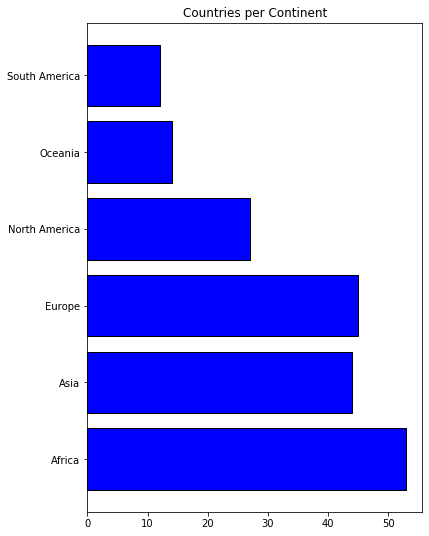

In [32]:
plt.figure(figsize = (6, 9))
plt.barh(y=list(width.keys()), width=list(width.values()) , color = 'blue', edgecolor = 'black');
plt.title("Countries per Continent")

## Step 12

In [33]:
#How many countries are represented in this dataset? What range of years are represented?

In [34]:
gdp_df.Country.nunique()

195

In [35]:
gdp_df.columns

Index(['Continent', 'Country', 'Year', 'GDP_Per_Capita'], dtype='object')

In [36]:
gdp_df.Year.nunique()

28

## Step 13

In [37]:
#Create a new dataframe by subsetting `gdp_df` to just the year 2014. Call this new dataframe `gdp_2014`.

In [38]:
gdp_df.Year[19]

'2014'

In [39]:
gdp_df.groupby('Year').nunique()

,Continent,Country,Year,GDP_Per_Capita
Year,,,,
1990,6,166,1,166
1991,6,167,1,167
1992,6,169,1,169
1993,6,171,1,171
1994,6,174,1,174
1995,6,180,1,180
1996,6,180,1,180
1997,6,182,1,182
1998,6,183,1,183


In [40]:
gdp_2014=gdp_df[gdp_df['Year'] == '2014']
gdp_2014

,Continent,Country,Year,GDP_Per_Capita
3,Asia,Afghanistan,2014,1795.735834
19,Europe,Albania,2014,10700.522802
47,Africa,Algeria,2014,13549.025150
75,Africa,Angola,2014,6813.052106
103,North America,Antigua and Barbuda,2014,20820.551057
131,South America,Argentina,2014,18935.002497
159,Europe,Armenia,2014,7954.195331
187,North America,Aruba,2014,36172.933355
215,Oceania,Australia,2014,43672.130373
243,Europe,Austria,2014,44246.893265


## Step 14

In [41]:
gdp_2014.describe()

,GDP_Per_Capita
count,192.000000
mean,18706.998123
std,20708.344052
min,377.908916
25%,4078.542518
50%,11822.492901
75%,26304.316361
max,130439.187070


## Step 15(a) 

In [42]:
gdp_2014.max(0)

Continent         South America
Country                Zimbabwe
Year                       2014
GDP_Per_Capita           130439
dtype: object

In [43]:
gdp_2014.sort_values(by='GDP_Per_Capita').head()

,Continent,Country,Year,GDP_Per_Capita
3006,Africa,Mauritania,2014,377.908916
924,Africa,Central African Republic,2014,676.675821
767,Africa,Burundi,2014,768.469837
1120,Africa,Dem. Rep. Congo,2014,784.872656
3425,Africa,Niger,2014,900.136918


In [44]:
gdp_2014.sort_values(by='GDP_Per_Capita').tail()

,Continent,Country,Year,GDP_Per_Capita
683,Asia,Brunei,2014,76448.593329
4222,Asia,Singapore,2014,81965.361071
2759,Europe,Luxembourg,2014,92349.186486
3835,Asia,Qatar,2014,116693.507701
2787,Asia,"Macao SAR, China",2014,130439.187070


## Step 16

In [45]:
#Add a column to your 2014 dataframe called 'GDP_Group'. 
#In this column, assign each country to one of three categories: 
#"Low" if the country's GDP Per Capita is below the 25th percentile 
    #of GDP Per Capita, "Medium" if it is between the 25th and 75th 
    #percentile, and "High" if it is above the 75th percentile. 
#How do the continents differ in terms of numbers of countries in 
#each group?

In [46]:
def categ(x): 
    per25=np.percentile(gdp_2014.loc[:,['GDP_Per_Capita']], 25)
    per50=np.percentile(gdp_2014.loc[:,['GDP_Per_Capita']], 50)
    per75=np.percentile(gdp_2014.loc[:,['GDP_Per_Capita']],75)
    
    if x < per25: 
        return 'Low'
    if x > per75: 
        return 'High'
        
    return 'Medium'

gdp_2014['GDP_Group']=gdp_2014['GDP_Per_Capita'].apply(categ)
gdp_2014

/Users/barrettrogers/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,Continent,Country,Year,GDP_Per_Capita,GDP_Group
3,Asia,Afghanistan,2014,1795.735834,Low
19,Europe,Albania,2014,10700.522802,Medium
47,Africa,Algeria,2014,13549.025150,Medium
75,Africa,Angola,2014,6813.052106,Medium
103,North America,Antigua and Barbuda,2014,20820.551057,Medium
131,South America,Argentina,2014,18935.002497,Medium
159,Europe,Armenia,2014,7954.195331,Medium
187,North America,Aruba,2014,36172.933355,High
215,Oceania,Australia,2014,43672.130373,High
243,Europe,Austria,2014,44246.893265,High


## Step 15(b)/17(a)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110924550>]],
      dtype=object)

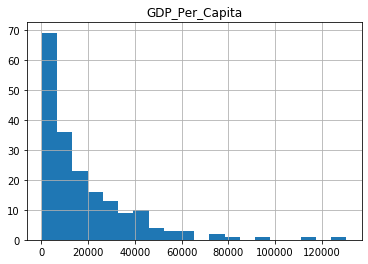

In [47]:
gdp_2014.hist(bins=20)

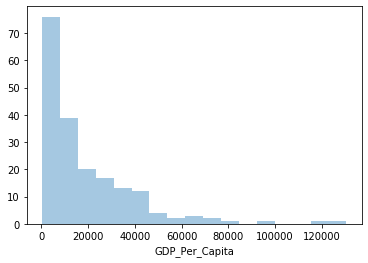

In [49]:
sns.distplot(gdp_2014['GDP_Per_Capita'], kde=False)
#kde=kernal density estimate and adds a line 

## Step 17(b)

In [50]:
#Using Scipy, find the skewness of GDP_Per_Capita values 
skew(gdp_2014['GDP_Per_Capita'])

2.238776247132382

## Step 18

In [51]:
#Create a seaborn boxplot showing GDP per capita in 2014 split
#out by continent. What do you notice?

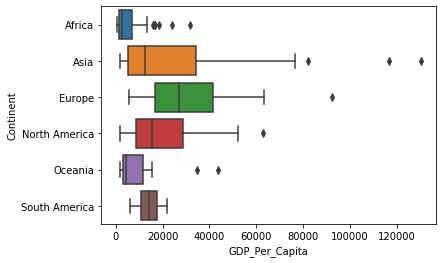

In [66]:
sns.boxplot(data=gdp_2014, x='GDP_Per_Capita',y='Continent')